In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.spatial import distance
# from scipy.sparse.csgraph import minimum_spanning_tree
import math
import pickle
import time


## USING PREVIOUS DATA

We want to be able to save thing 

IF Pickled = True then we will previously simulated data using the pickle packge

In [2]:
PICKLED = True 

##### set parent directory

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
# print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Updated Directory: /mnt/c/users/rjmay/code/research_ms


### Simulation stage

In [4]:
from modules.multi_bounds import bounds_class


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
mean_sep = np.linspace(0, 3, 15 , endpoint = True)

mean_sep = np.insert(mean_sep, 1, .1)
# mean_sep = np.linspace(.05, 3, 2 , endpoint = True)

mean_sep

array([0.        , 0.1       , 0.21428571, 0.42857143, 0.64285714,
       0.85714286, 1.07142857, 1.28571429, 1.5       , 1.71428571,
       1.92857143, 2.14285714, 2.35714286, 2.57142857, 2.78571429,
       3.        ])

In [6]:
bound_obj_lst = []

bound_obj_lst2 = []


if PICKLED: ## We just skip all the data creation if we are using save data. 
    print("USING PREVIOUS DATA NOT SIMULATING DATA ")
else:

    MC_num = 500

    for i in mean_sep:

        start = time.time()

        mean1 = [0, 0, 0, 0, 0 ]
        covariance1 = np.identity(5)
        mean2 = [i, 0, 0, 0, 0  ]
        covariance2= np.identity(5)
        mean1 = np.array(mean1)
        mean2 = np.array(mean2)
        
        tight_params = [4, 3 ]
        
        sample_size= 100
        n0, n1 = sample_size, sample_size
        
        
        
        params1  = [mean1, covariance1, n0]
        params2  = [mean2, covariance2, n1]

        bounds = bounds_class("mv_normal", params1, params2, threads =2,  MC_num = MC_num, tight_params = tight_params )
        
        bound_obj_lst.append(bounds)
        
        sample_size= 500
        n0, n1 = sample_size, sample_size
        params1  = [mean1, covariance1, n0]
        params2  = [mean2, covariance2, n1]
        
        bounds2 = bounds_class("mv_normal", params1, params2, threads =2,  MC_num = MC_num, tight_params = tight_params )

        bound_obj_lst2.append(bounds2)
        
        
        end = time.time()
        
        print("done with ", i, " in ",  end -start )



done with  0.0  in  135.49427008628845
done with  0.1  in  132.1038212776184
done with  0.21428571428571427  in  135.5481355190277
done with  0.42857142857142855  in  129.34406781196594
done with  0.6428571428571428  in  128.59283304214478
done with  0.8571428571428571  in  137.97438192367554
done with  1.0714285714285714  in  125.06934380531311
done with  1.2857142857142856  in  136.53765892982483
done with  1.5  in  136.32896661758423
done with  1.7142857142857142  in  133.55712127685547
done with  1.9285714285714284  in  123.2211925983429
done with  2.142857142857143  in  132.0894491672516
done with  2.357142857142857  in  128.7542326450348
done with  2.571428571428571  in  125.14691090583801
done with  2.7857142857142856  in  127.14793229103088
done with  3.0  in  124.1962080001831


##### Pickling
This is where the data either gets save or loaded

In [7]:
file_path = 'sim_data/means_sep_as_BER.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


if PICKLED  == False:
    
    objects_to_save = bound_obj_lst, bound_obj_lst2


    with open(file_path, 'wb') as file:
        # Use pickle.dump to serialize and write the list of objects to the file
        pickle.dump(objects_to_save, file)
    print(f'Objects saved to {file_path}')
    

elif PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    bound_obj_lst, bound_obj_lst2 = loaded_objects

Objects saved to sim_data/means_sep_as_BER.pkl


## Using the data

may or not be pickled. 

In [8]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 5 + dx, dx)

    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)

    fmin = np.minimum(f0, f1)

    BER = 0.5 * np.sum(fmin * dx)
    
    exact.append(BER)

#     print("BER 2d:", BER)

### Plotting using sample size 100

In [21]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]

tight_l = []
tight_u = []

for obj in bound_obj_lst:
    a,b = obj.get_bounds_dp()
    dp_l.append(np.mean(a))
    dp_u.append(np.mean(b))
    
    a,b = obj.get_bounds_Bha()
    Bha_l.append(np.mean(a))
    Bha_u.append(np.mean(b))
    
    a, b = obj.get_bounds_tight()
    tight_l.append(np.mean(a))
    tight_u.append(np.mean(b))

    
    

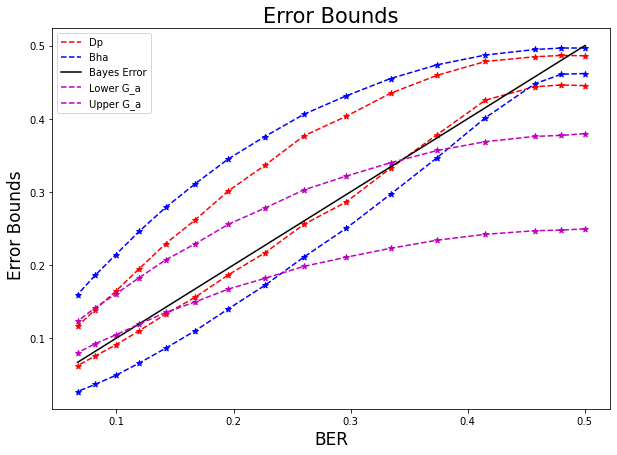

In [10]:
fs =17
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)


ax.plot(exact, dp_l, 'r--', label='Dp')
ax.plot(exact, dp_u, 'r--')

ax.scatter(exact, dp_l, color='r', marker='*')
ax.scatter(exact, dp_u, color ='r', marker ='*' )

ax.plot(exact, Bha_l, 'b--', label='Bha')
ax.plot(exact, Bha_u, 'b--')
ax.scatter(exact, Bha_u, color='b', marker='*')
ax.scatter(exact, Bha_l, color ='b', marker ='*' )


ax.plot(exact, exact, 'k', label='Bayes Error')

ax.plot(exact, tight_l, 'm--', label='Lower G_a')
ax.plot(exact, tight_u, 'm--', label='Upper G_a')
ax.scatter(exact, tight_l, color='m', marker='*')
ax.scatter(exact, tight_u, color ='m', marker ='*' )


ax.set_xlabel("BER", fontsize = fs)
ax.set_ylabel("Error Bounds  ", fontsize=fs)
ax.set_title("Error Bounds", fontsize = fs +4)
ax.legend()
# plt.savefig("bounds.png",facecolor=(1,1,1,1))

plt.show()


In [11]:
validity_dp_l = np.zeros(len(mean_sep))
validity_dp_u = np.zeros(len(mean_sep))

validity_Bha_l = np.zeros(len(mean_sep))
validity_Bha_u =  np.zeros(len(mean_sep))

validity_tight_l = np.zeros(len(mean_sep))
validity_tight_u =  np.zeros(len(mean_sep))

MC_num = bound_obj_lst[0].get_MC_num()


for i in range(len(mean_sep)):
    BER = exact[i]
    Bha_l_temp, Bha_u_temp = bound_obj_lst[i].get_bounds_Bha()
    dp_l_temp, dp_u_temp = bound_obj_lst[i].get_bounds_dp()
    tight_l_temp, tight_u_temp = bound_obj_lst[i].get_bounds_tight()
    for j in range(MC_num):
        if Bha_l_temp[j] < BER:
            validity_Bha_l[i] += 1
        if Bha_u_temp[j] > BER:
            validity_Bha_u[i] += 1
    
        if dp_l_temp[j] < BER:
            validity_dp_l[i] += 1
        if dp_u_temp[j] > BER:
            validity_dp_u[i] += 1
        if tight_l_temp[j] < BER:
            validity_tight_l[i] += 1
        if tight_u_temp[j]> BER:
            validity_tight_u[i] += 1


In [12]:
print(validity_dp_l,  validity_dp_u, validity_Bha_l, validity_Bha_u, validity_tight_l, validity_tight_u )

[239. 247. 236. 237. 275. 292. 323. 276. 325. 299. 321. 330. 352. 342.
 345. 295.] [261. 357. 431. 477. 496. 497. 496. 498. 498. 499. 499. 495. 496. 492.
 488. 486.] [274. 260. 268. 331. 395. 417. 448. 464. 487. 491. 497. 500. 500. 499.
 500. 500.] [226. 497. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500.] [500. 500. 500. 500. 500. 500. 500. 500. 499. 486. 444. 347. 250. 176.
 100.  64.] [  0.   0.   0.   0.  73. 313. 449. 484. 493. 500. 500. 500. 500. 500.
 500. 500.]


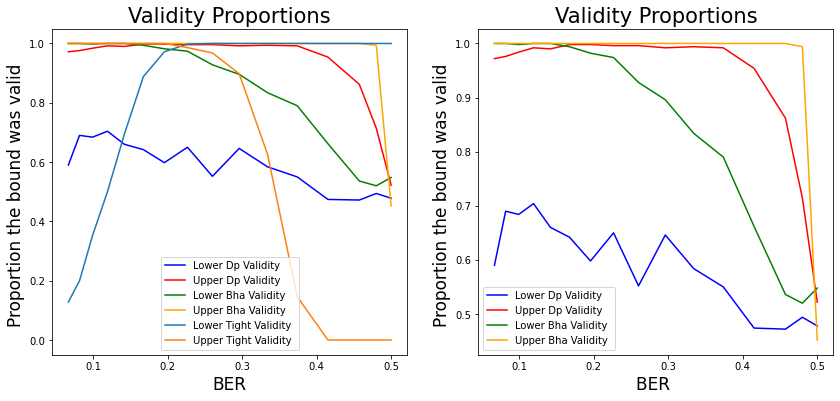

In [13]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax = axes[0]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(exact, validity_dp_l/ MC_num, 'b',  label='Lower Dp Validity ')
ax.plot(exact, validity_dp_u/ MC_num, 'r', label='Upper Dp Validity ')

ax.plot(exact, validity_Bha_l/ MC_num,'g', label='Lower Bha Validity ')
ax.plot(exact, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')


ax.plot(exact, validity_tight_l/ MC_num, label='Lower Tight Validity ')
ax.plot(exact, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# ax.set_xticks(sample_sizes)

ax.set_xlabel("BER", fontsize = fs)
ax.set_ylabel("Proportion the bound was valid ", fontsize=fs)
ax.set_title("Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(exact, validity_dp_l/ MC_num, 'b',  label='Lower Dp Validity ')
ax.plot(exact, validity_dp_u/ MC_num, 'r', label='Upper Dp Validity ')

ax.plot(exact, validity_Bha_l/ MC_num,'g', label='Lower Bha Validity ')
ax.plot(exact, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')


# ax.plot(exact, validity_tight_l/ MC_num, label='Lower Tight Validity ')
# ax.plot(exact, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# # ax.set_xticks(sample_sizes)


ax.set_xlabel("BER ", fontsize = fs)
ax.set_ylabel("Proportion the bound was valid ", fontsize=fs)
ax.set_title("Validity Proportions" , fontsize = fs +4)
ax.legend()


# plt.savefig("proportions.png",facecolor=(1,1,1,1))
plt.show()

### Plotting using sample size 500

In [14]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]

tight_l = []
tight_u = []

for obj in bound_obj_lst2:
    a,b = obj.get_bounds_dp()
    dp_l.append(np.mean(a))
    dp_u.append(np.mean(b))
    
    a,b = obj.get_bounds_Bha()
    Bha_l.append(np.mean(a))
    Bha_u.append(np.mean(b))
    
    a, b = obj.get_bounds_tight()
    tight_l.append(np.mean(a))
    tight_u.append(np.mean(b))

    

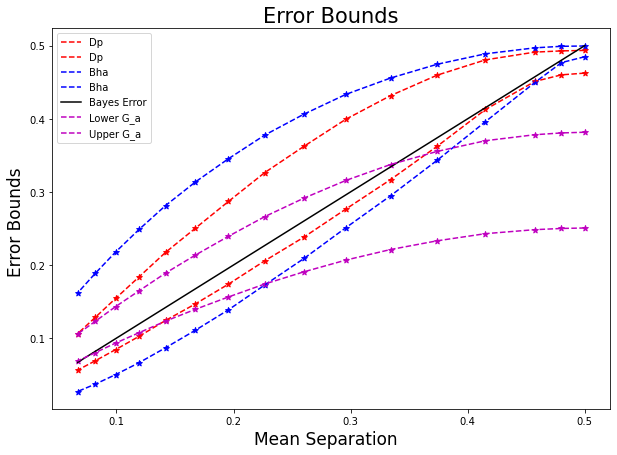

In [15]:
fs =17
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)


ax.plot(exact, dp_l, 'r--', label='Dp')
ax.plot(exact, dp_u, 'r--', label='Dp')

ax.scatter(exact, dp_l, color='r', marker='*')
ax.scatter(exact, dp_u, color ='r', marker ='*' )

ax.plot(exact, Bha_l, 'b--', label='Bha')
ax.plot(exact, Bha_u, 'b--', label='Bha')
ax.scatter(exact, Bha_u, color='b', marker='*')
ax.scatter(exact, Bha_l, color ='b', marker ='*' )


ax.plot(exact, exact, 'k', label='Bayes Error')

ax.plot(exact, tight_l, 'm--', label='Lower G_a')
ax.plot(exact, tight_u, 'm--', label='Upper G_a')
ax.scatter(exact, tight_l, color='m', marker='*')
ax.scatter(exact, tight_u, color ='m', marker ='*' )


ax.set_xlabel("Mean Separation  ", fontsize = fs)
ax.set_ylabel("Error Bounds ", fontsize=fs)
ax.set_title("Error Bounds", fontsize = fs +4)
ax.legend()
# plt.savefig("bounds.png",facecolor=(1,1,1,1))

plt.show()


In [25]:
validity_dp_l = np.zeros(len(mean_sep))
validity_dp_u = np.zeros(len(mean_sep))

validity_Bha_l = np.zeros(len(mean_sep))
validity_Bha_u =  np.zeros(len(mean_sep))

validity_tight_l = np.zeros(len(mean_sep))
validity_tight_u =  np.zeros(len(mean_sep))

MC_num = bound_obj_lst[1].get_MC_num()


for i in range(len(mean_sep)):
    BER = exact[i]
    Bha_l_temp, Bha_u_temp = bound_obj_lst2[i].get_bounds_Bha()
    dp_l_temp, dp_u_temp = bound_obj_lst2[i].get_bounds_dp()
    tight_l_temp, tight_u_temp = bound_obj_lst2[i].get_bounds_tight()
    for j in range(MC_num):
        if Bha_l_temp[j] < BER:
            validity_Bha_l[i] += 1
        if Bha_u_temp[j] > BER:
            validity_Bha_u[i] += 1
    
        if dp_l_temp[j] < BER:
            validity_dp_l[i] += 1
        if dp_u_temp[j] > BER:
            validity_dp_u[i] += 1
        if tight_l_temp[j] < BER:
            validity_tight_l[i] += 1
        if tight_u_temp[j]> BER:
            validity_tight_u[i] += 1


In [26]:
print(validity_dp_l,  validity_dp_u, validity_Bha_l, validity_Bha_u, validity_tight_l, validity_tight_u )

[249. 247. 270. 299. 352. 393. 408. 447. 456. 475. 482. 464. 484. 483.
 473. 464.] [251. 432. 498. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500.] [251. 268. 341. 430. 478. 499. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500.] [249. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500.] [500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 498. 485. 434.
 310. 198.] [  0.   0.   0.   0.   1. 328. 491. 500. 500. 500. 500. 500. 500. 500.
 500. 500.]


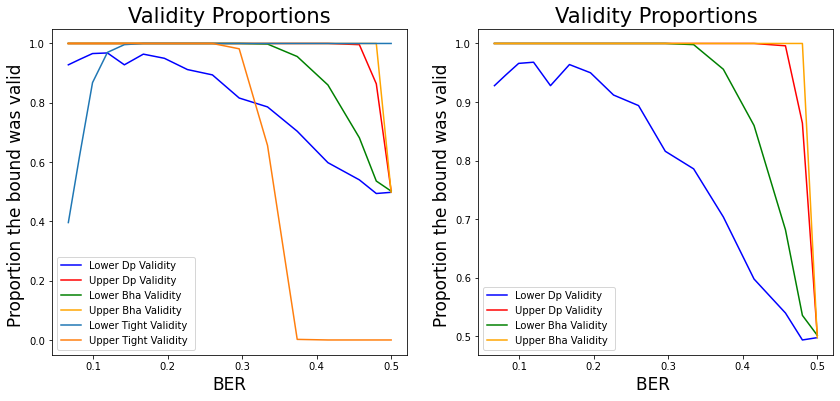

In [27]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax = axes[0]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(exact, validity_dp_l/ MC_num, 'b',  label='Lower Dp Validity ')
ax.plot(exact, validity_dp_u/ MC_num, 'r', label='Upper Dp Validity ')

ax.plot(exact, validity_Bha_l/ MC_num,'g', label='Lower Bha Validity ')
ax.plot(exact, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')


ax.plot(exact, validity_tight_l/ MC_num, label='Lower Tight Validity ')
ax.plot(exact, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# ax.set_xticks(sample_sizes)

ax.set_xlabel("BER", fontsize = fs)
ax.set_ylabel("Proportion the bound was valid ", fontsize=fs)
ax.set_title("Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(exact, validity_dp_l/ MC_num, 'b',  label='Lower Dp Validity ')
ax.plot(exact, validity_dp_u/ MC_num, 'r', label='Upper Dp Validity ')

ax.plot(exact, validity_Bha_l/ MC_num,'g', label='Lower Bha Validity ')
ax.plot(exact, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')


# ax.plot(exact, validity_tight_l/ MC_num, label='Lower Tight Validity ')
# ax.plot(exact, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# # ax.set_xticks(sample_sizes)


ax.set_xlabel("BER ", fontsize = fs)
ax.set_ylabel("Proportion the bound was valid ", fontsize=fs)
ax.set_title("Validity Proportions" , fontsize = fs +4)
ax.legend()


# plt.savefig("proportions.png",facecolor=(1,1,1,1))
plt.show()